In [2]:
import pandas as pd

df = pd.read_csv('/home/ndavs/Downloads/traintest_data.csv').drop("Unnamed: 0", axis=1)
df.head()


,reco_id_curr,target,contract_type_name,gender,own_car_flag,own_realty_flag,children_count,income,loan_body,annuity_payment,...,document_18_flag,document_19_flag,document_20_flag,document_21_flag,requests_bki_hour,requests_bki_day,requests_bki_week,requests_bki_month,requests_bki_qrt,requests_bki_year
0,175028,0,Revolving loans,F,N,Y,0,202500.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,236424,0,Cash loans,F,N,N,0,135000.0,454500.0,19237.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,456069,0,Cash loans,F,N,N,0,67500.0,190764.0,12321.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,339733,0,Cash loans,F,N,N,0,157500.0,1350000.0,46926.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,121041,0,Cash loans,F,Y,Y,0,117000.0,594000.0,19291.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0


In [3]:
X = df.drop('target', axis=1)
y = df['target']
X = X.loc[:, ['gender', 'loan_body', 'income', 'income_type_name']]
X


,gender,loan_body,income,income_type_name
0,F,405000.0,202500.0,Working
1,F,454500.0,135000.0,Commercial associate
2,F,190764.0,67500.0,Working
3,F,1350000.0,157500.0,Working
4,F,594000.0,117000.0,Working
...,...,...,...,...
209102,F,270000.0,180000.0,Working
209103,M,312840.0,112500.0,Working
209104,F,2013840.0,202500.0,Commercial associate
209105,M,162000.0,67500.0,Working


In [4]:
y.value_counts()

# Домашки

target
0    192219
1     16888
Name: count, dtype: int64

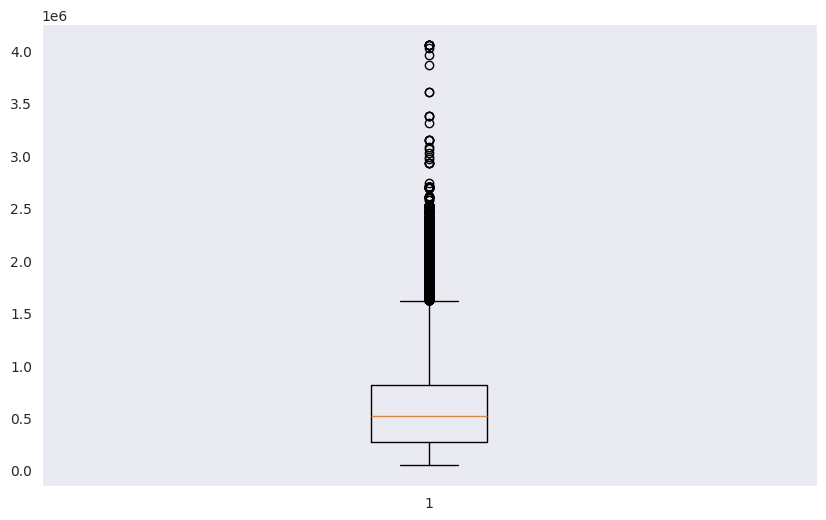

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.boxplot(X['loan_body'])
plt.grid()


In [6]:
q25 = X['loan_body'].quantile(0.25)
q75 = X['loan_body'].quantile(0.75)
iqr = q75 - q25
iqr
q25 - 1.5 * iqr
q75 + 1.5 * iqr

np.float64(1616625.0)

In [7]:
X['loan_body'].min()

np.float64(45000.0)

In [8]:
loan_body_0 = df[df['target'] == 0]['loan_body']
loan_body_1 = df[df['target'] == 1]['loan_body']

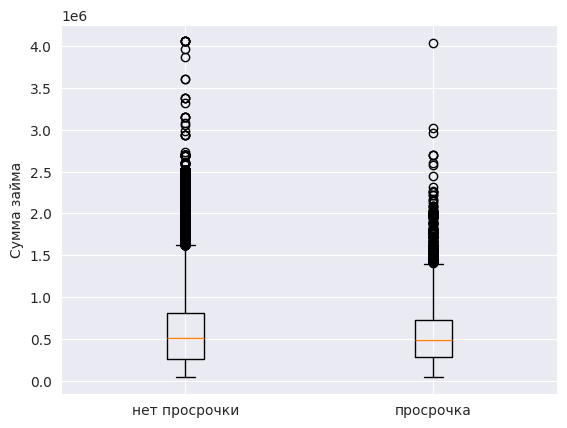

In [12]:
plt.boxplot([loan_body_0, loan_body_1], tick_labels=['нет просрочки', 'просрочка'])
plt.grid(True)
plt.ylabel('Сумма займа')
plt.show()

In [25]:
loan_body_0 = df[df['target'] == 0]['income']
loan_body_1 = df[df['target'] == 1]['income']

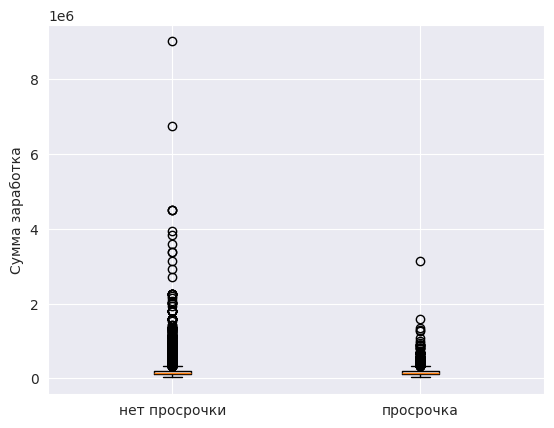

In [26]:
plt.boxplot([loan_body_0, loan_body_1], tick_labels=['нет просрочки', 'просрочка'])
plt.grid(True)
plt.ylabel('Сумма заработка')
plt.show()

In [16]:
X[X['income'] > 100_000_000]

,gender,loan_body,income,income_type_name
82764,F,562491.0,117000000.0,Working


In [24]:
df = df[df['income'] < 100_000_00]

In [28]:
def predict(row):
    if row['loan_body'] < 1_200_000 and (row['income'] < 200_000):
        return 1
    return 0

In [29]:
df['pred'] = df.apply(predict, axis=1)

In [30]:
df['pred'].value_counts()

pred
1    141657
0     67447
Name: count, dtype: int64

In [32]:
df['f_acc'] = df['pred'] == df['target']
df['f_acc']

0          True
1         False
2         False
3          True
4         False
          ...  
209102    False
209103    False
209104     True
209105    False
209106     True
Name: f_acc, Length: 209104, dtype: bool

In [39]:
len(df[df['f_acc'] == True]) / len(df['target'])

0.35785063891652